# Looking at merged tract-patch catalogs in Run 1.1 leading up to DC2
Michael Wood-Vasey

In [22]:
import os

import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 8)

import pandas as pd

In [15]:
merged_tract_data_dir = '/global/projecta/projectdirs/lsst/global/in2p3/Run1.1-test2/summary/'

In [16]:
tract, patch = 4849, 16
basename = 'merged_tract_%d.hdf5' % tract
key = 'coadd_%d_%2d' % (tract, patch)

In [68]:
basename = 'merged_tract_4849_1,1_1,2.hdf5'
key = None

In [69]:
merged_tract_file = os.path.join(merged_tract_data_dir, basename)

In [70]:
df = pd.read_hdf(merged_tract_file, key=key)

In [71]:
print(len(df), "coadd objects")

31328 coadd objects


<IPython.core.display.Javascript object>


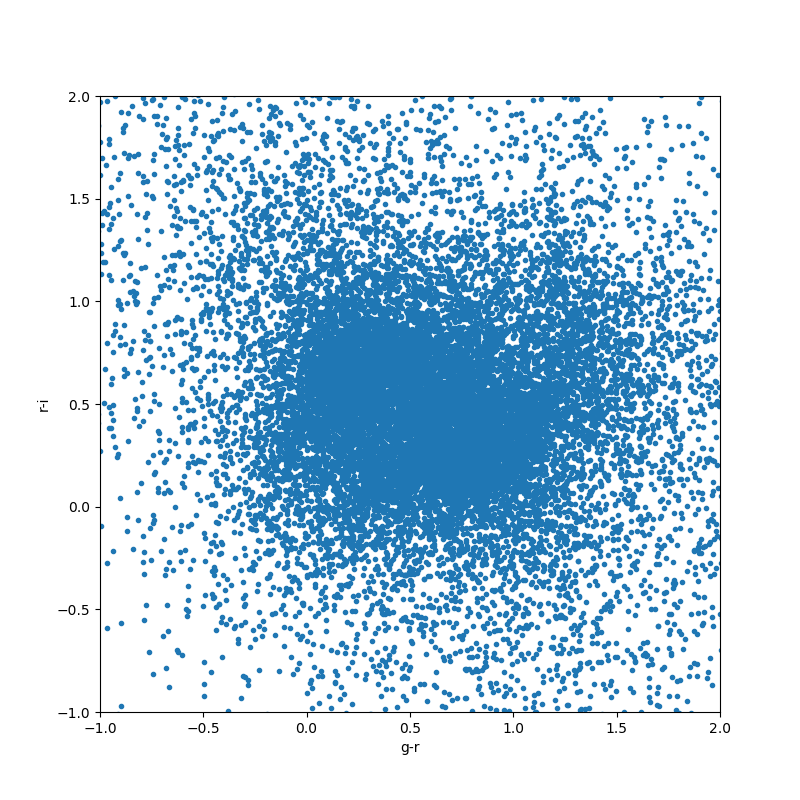

In [90]:
plt.scatter(df['g_mag'] - df['r_mag'], df['r_mag'] - df['i_mag'], marker='.')
plt.xlim(-1, +2)
plt.ylim(-1, +2)
plt.xlabel('g-r')
plt.ylabel('r-i')

That's a bit of a mess, but maybe we're starting to see a bit of some structure resolving.  Let's do the traditional simple 2D histogram version:

<IPython.core.display.Javascript object>


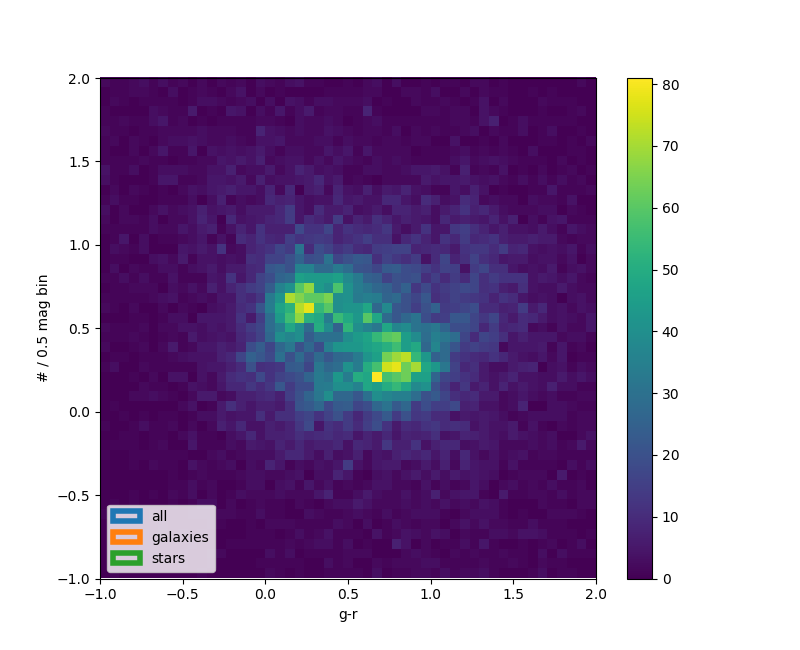

/usr/common/software/python/3.6-anaconda-4.4/lib/python3.6/site-packages/numpy/lib/function_base.py:973: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


In [73]:
plt.figure(figsize=(8,6.5))
plt.hist2d(df['g_mag']-df['r_mag'], df['r_mag']-df['i_mag'],
           range=((-1, +2), (-1, +2)), bins=51)
plt.colorbar()
plt.xlabel('g-r')
plt.ylabel('r-i')


<IPython.core.display.Javascript object>


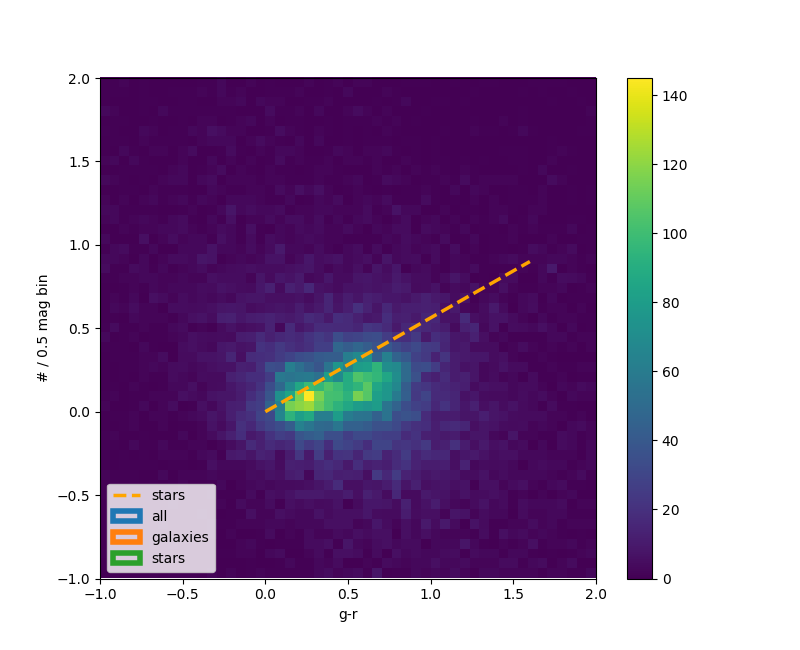

/usr/common/software/python/3.6-anaconda-4.4/lib/python3.6/site-packages/numpy/lib/function_base.py:973: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


In [74]:
plt.figure(figsize=(8,6.5))
plt.hist2d(df['r_mag']-df['i_mag'], df['i_mag']-df['z_mag'],
           range=((-1, +2), (-1, +2)), bins=51)
plt.colorbar()
plt.xlabel('r-i')
plt.ylabel('i-z')

plt.plot([0, 1.6], [0, 0.9], label='stars', color='orange', linewidth=2.5, linestyle='--')

Hey, that looks familiar!  I feel like I've taken some class where I saw something like that.

Hmmm... I wonder which of these are stars and which galaxies?

In [75]:
safe_max_extended = 1.0
stars = df[df.base_ClassificationExtendedness_value < safe_max_extended]
galaxies = df[df.base_ClassificationExtendedness_value >= safe_max_extended]

<IPython.core.display.Javascript object>


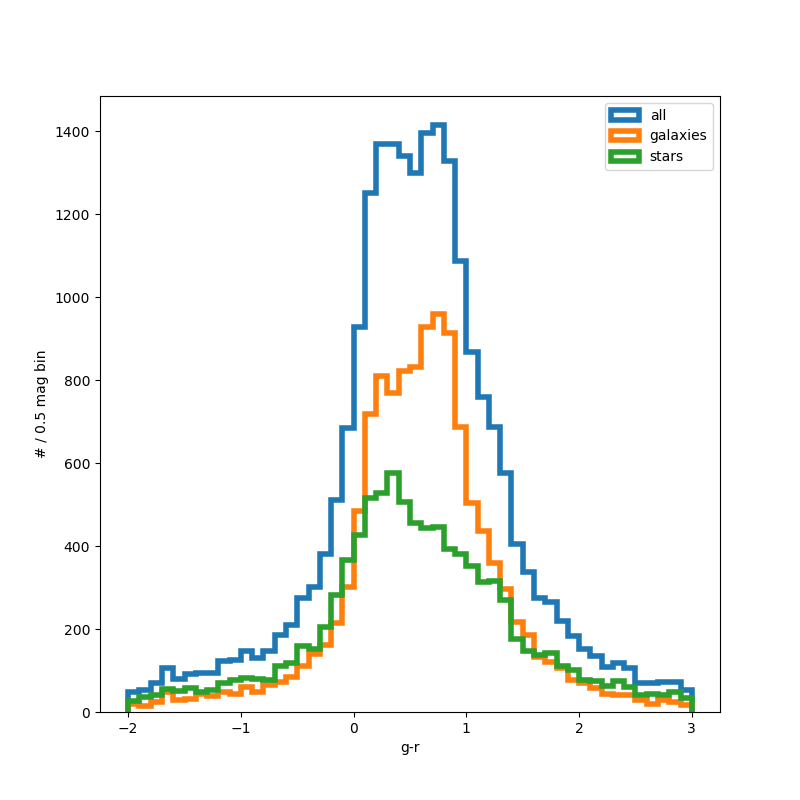

In [78]:
hist_kwargs = {'bins': np.linspace(-2, 3, 51),
               'range': (-2, +3),
               'linewidth': 4,
               'histtype': 'step'}
          
plt.hist(df['g_mag'] - df['r_mag'], label='all', **hist_kwargs)
plt.hist(galaxies['g_mag'] - galaxies['r_mag'], label='galaxies', **hist_kwargs)
plt.hist(stars['g_mag'] - stars['r_mag'], label='stars', **hist_kwargs)
plt.xlabel('g-r')
plt.ylabel('# / 0.5 mag bin')
plt.legend()

/usr/common/software/python/3.6-anaconda-4.4/lib/python3.6/site-packages/numpy/lib/function_base.py:973: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


<IPython.core.display.Javascript object>


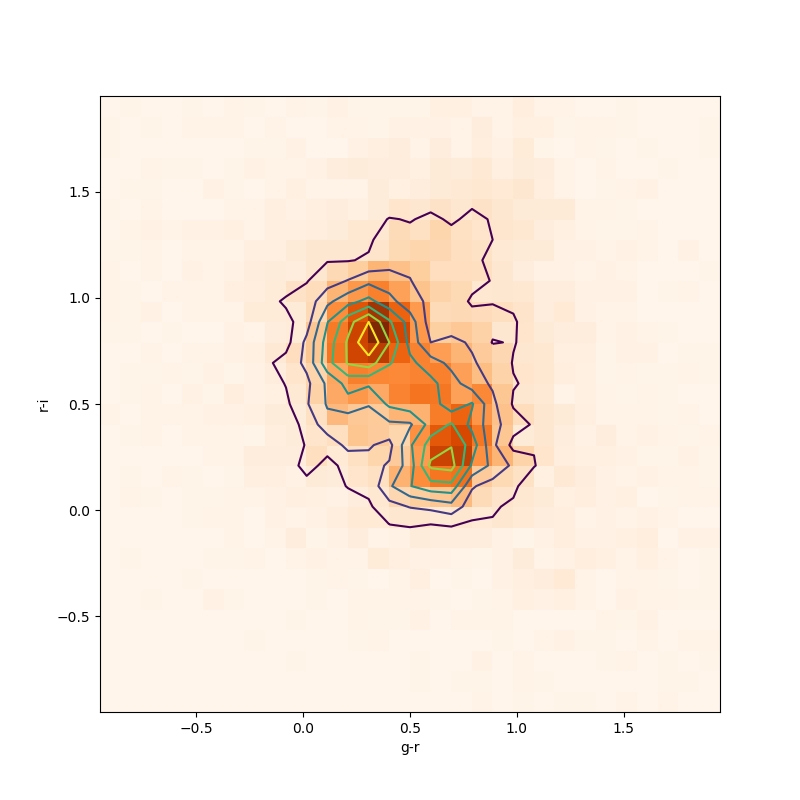

In [82]:
z = galaxies
zi, xedges, yedges = np.histogram2d(z['g_mag']-z['r_mag'], z['r_mag']-z['i_mag'],
                                    range=((-1, +2), (-1, +2)), bins=31)
xi = (xedges[1:] + xedges[:-1])/2
yi = (yedges[1:] + yedges[:-1])/2

plt.pcolormesh(xi, yi, zi, cmap='Oranges')
plt.contour(xi, yi, zi)
plt.xlabel('g-r')
plt.ylabel('r-i')

In [85]:
z = stars
zi, xedges, yedges = np.histogram2d(z['g_mag']-z['r_mag'], z['r_mag']-z['i_mag'],
                                    range=((-1, +2), (-1, +2)), bins=31)
xi = (xedges[1:] + xedges[:-1])/2
yi = (yedges[1:] + yedges[:-1])/2

plt.pcolormesh(xi, yi, zi, cmap='Oranges')
plt.contour(xi, yi, zi)
plt.xlabel('g-r')
plt.ylabel('r-i')

/usr/common/software/python/3.6-anaconda-4.4/lib/python3.6/site-packages/numpy/lib/function_base.py:973: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


Let's overplot a rough stellar locus.  This is just a simple approximation with two lines.  See, e.g., Ivezic+2007, AJ, 134, 973. Fig. 3 (http://iopscience.iop.org/article/10.1086/519976/pdf)

<IPython.core.display.Javascript object>


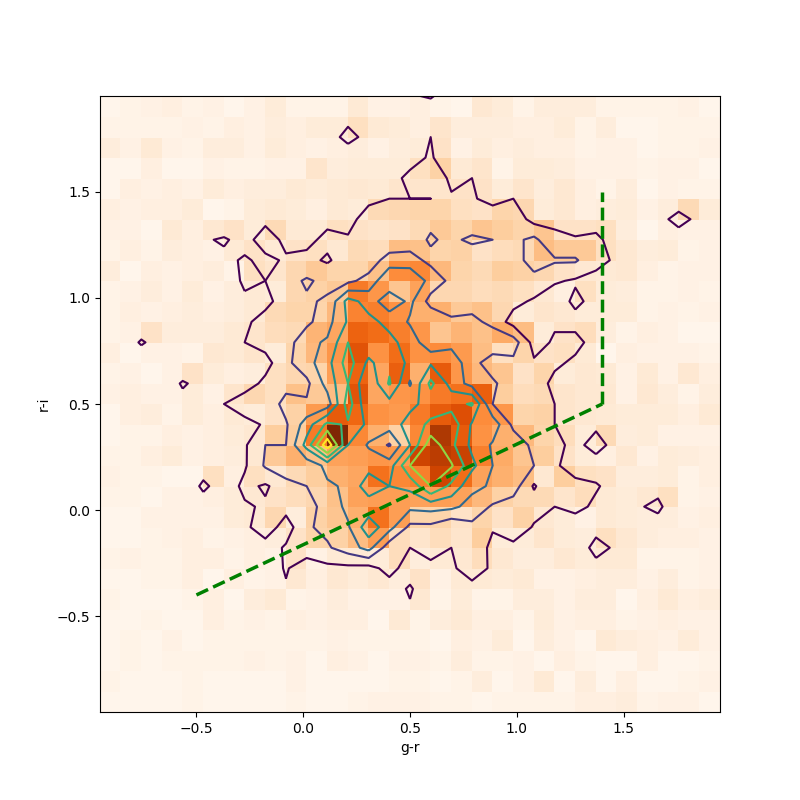

In [84]:
m_stars_gmr = [+1.4, +1.4]
m_stars_rmi = [+0.5, +1.5]

other_stars_gmr = [-0.5, +1.4]
other_stars_rmi = [-0.4, +0.5]

plt.plot(other_stars_gmr, other_stars_rmi, linestyle='--', linewidth=2.5, color='green')
plt.plot(m_stars_gmr, m_stars_rmi, linestyle='--', linewidth=2.5, color='green')

1.6875

/usr/common/software/python/3.6-anaconda-4.4/lib/python3.6/site-packages/numpy/lib/function_base.py:973: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


<IPython.core.display.Javascript object>


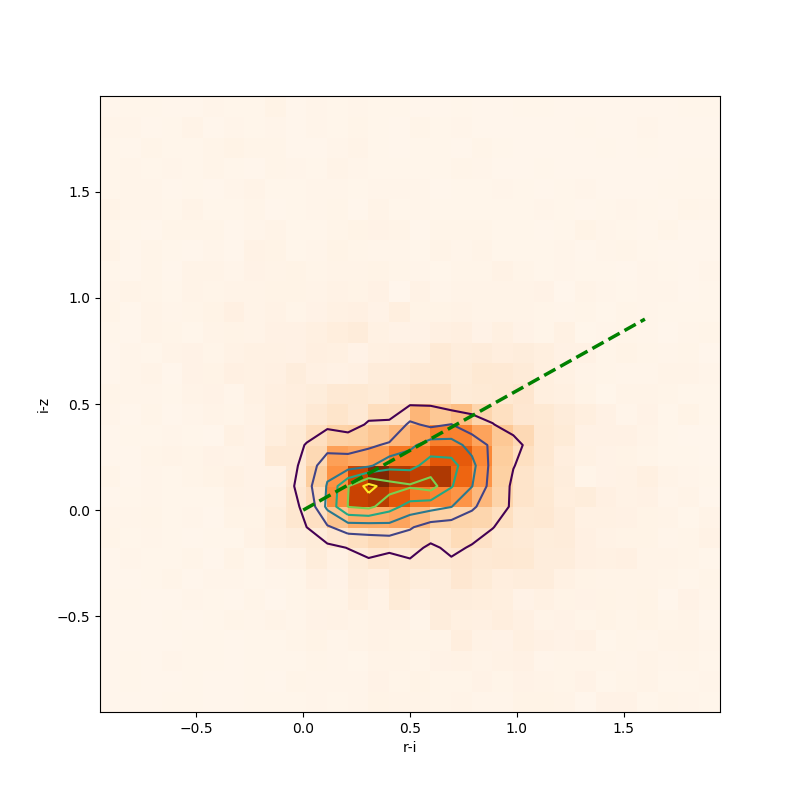

In [87]:
z = galaxies
zi, xedges, yedges = np.histogram2d(z['i_mag']-z['z_mag'], z['r_mag']-z['i_mag'],
                                    range=((-1, +2), (-1, +2)), bins=31)
xi = (xedges[1:] + xedges[:-1])/2
yi = (yedges[1:] + yedges[:-1])/2

plt.pcolormesh(xi, yi, zi, cmap='Oranges')
plt.contour(xi, yi, zi)
plt.xlabel('r-i')
plt.ylabel('i-z')

plt.plot([0, 1.6], [0, 0.9], label='stars', color='green', linewidth=2.5, linestyle='--')

/usr/common/software/python/3.6-anaconda-4.4/lib/python3.6/site-packages/numpy/lib/function_base.py:973: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


<IPython.core.display.Javascript object>


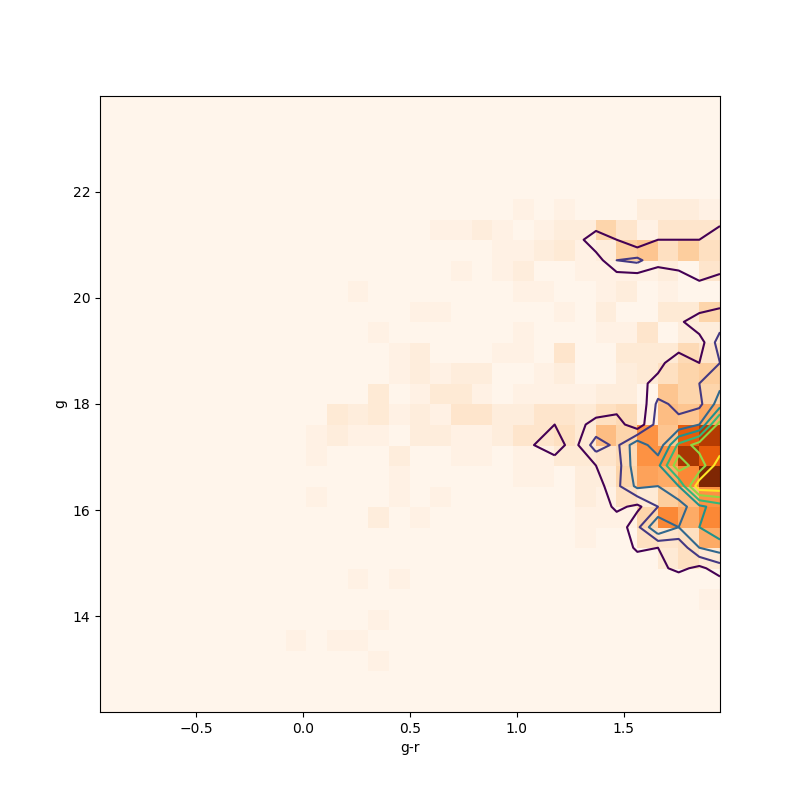

In [89]:
z = stars
zi, xedges, yedges = np.histogram2d(z['g_mag']-z['r_mag'], z['g_mag'],
                                    range=((-1, +2), (12, 24)), bins=31)
xi = (xedges[1:] + xedges[:-1])/2
yi = (yedges[1:] + yedges[:-1])/2

plt.pcolormesh(xi, yi, zi, cmap='Oranges')
plt.contour(xi, yi, zi)
plt.xlabel('g-r')
plt.ylabel('g')

## Appendix

## Density Estimation
We could entertain ourselves by doing a somewhat better density estimattion
E.g., a Gaussian kernel density estimation.

In [ ]:
# https://stackoverflow.com/questions/19390320/scatterplot-contours-in-matplotlib
def bin_kde(x, y, nbins=20, **kwargs):
    from scipy.stats import kde
    k = kde.gaussian_kde(x, y)
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbis*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# This doesn't exactly work, I've done something wrong here.
xi, yi, zi = bin_kde(stars['g_mag']-stars['r_mag'], stars['r_mag']-stars['i_mag'])

## Generic Catalog Reader (GCR)

After a little bit you'll find yourself wanting to ask interesting questions, like how well does the DC2 analysis recover the input sources?  A convenient framework for generalizing analyses of DESC-DC related catalogs is the the Generic Catalog Reader:

* GCR is a general utility
https://github.com/yymao/generic-catalog-reader
* The catalogs supporting DC2 are in:
https://github.com/LSSTDESC/gcr-catalogs

See 'DC2_Static_Coadd_CAtalog_reader.ipynb' notebook by Yao-Yuan Mao

https://github.com/LSSTDESC/DC2_Repo/blob/u/yymao/GCRforDC2Coadd/Notebooks/DC2%20Static%20Coadd%20Catalog%20reader.ipynb

We don't have a package management set up for our DESC+DC2 products, so that notebook starts with a bit of explicit insertion of DC2 scripts into the path.